In [1]:
#Importing the necessary libraries
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import accuracy_score
from torchvision.datasets import ImageFolder
from torchvision import transforms

In [2]:
#Loading the data
training = "D:\\New folder\\ML\\Completed\\Brain Tumor Classification\\archive (1)\\Training" 
testing = "D:\\New folder\\ML\\Completed\\Brain Tumor Classification\\archive (1)\\Testing"

# Creating a model using TensorFlow

* After creating the necessary convolution layers we need to pass the data into the dense layer.
* Before passing the data into the **fully connected** layer we need to flatten the data using a **flatten** layer because the fully connected(dense) only accepts data in 1D form.

In [3]:
#Creating the model
model = Sequential([
    #First Convolution layer
    Conv2D(filters=2,kernel_size=3, activation='sigmoid',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2, strides=1, padding='valid'),

    #Second Convolution layer
    Conv2D(filters=2,kernel_size=3, activation='relu',groups=1),
    MaxPool2D(pool_size=2, strides=1, padding='valid'),

    Flatten(),

    #Dense layers
    Dense(100,activation='relu'),
    Dense(100,activation='relu'),

    #Output layer
    Dense(4,activation='softmax') #the number of neurons in this layer represents the number of outputsMaxPool2DMaxPool2D
])

In [4]:
#printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 2)       56        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 221, 221, 2)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 219, 219, 2)       38        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 218, 218, 2)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 95048)             0         
                                                                 
 dense (Dense)               (None, 100)               9

In [5]:
#Compiling the model
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.0001),metrics=['accuracy'])

In [6]:
train_datagen = ImageDataGenerator(rescale = 1/.255)
train_generator = train_datagen.flow_from_directory(training, target_size=(224,224),batch_size=16, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale = 1/.255)
test_set = test_datagen.flow_from_directory(testing, target_size=(224,224),batch_size=16, class_mode='categorical')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [7]:
# Define the EarlyStopping callback
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [8]:
#Training the model
history = model.fit(train_generator, validation_data=test_set, epochs=20)

Epoch 1/20
357/357 [==============================] - 14s 38ms/step - loss: 0.5445 - accuracy: 0.8065 - val_loss: 0.3351 - val_accuracy: 0.8772
Epoch 2/20
357/357 [==============================] - 13s 36ms/step - loss: 0.1751 - accuracy: 0.9391 - val_loss: 0.2252 - val_accuracy: 0.9207
Epoch 3/20
357/357 [==============================] - 14s 38ms/step - loss: 0.0573 - accuracy: 0.9813 - val_loss: 0.2556 - val_accuracy: 0.9252
Epoch 4/20
357/357 [==============================] - 13s 38ms/step - loss: 0.0197 - accuracy: 0.9942 - val_loss: 0.2655 - val_accuracy: 0.9291
Epoch 5/20
357/357 [==============================] - 13s 37ms/step - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.2848 - val_accuracy: 0.9367
Epoch 6/20
357/357 [==============================] - 13s 38ms/step - loss: 0.0086 - accuracy: 0.9979 - val_loss: 0.3073 - val_accuracy: 0.9329
Epoch 7/20
357/357 [==============================] - 14s 38ms/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.3937 - val_accuracy:

, callbacks=[early_stopping]

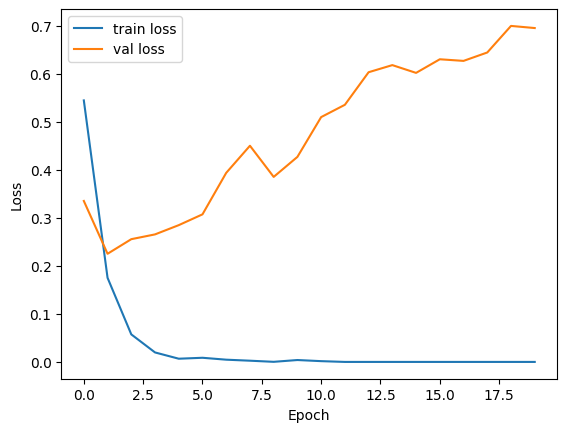

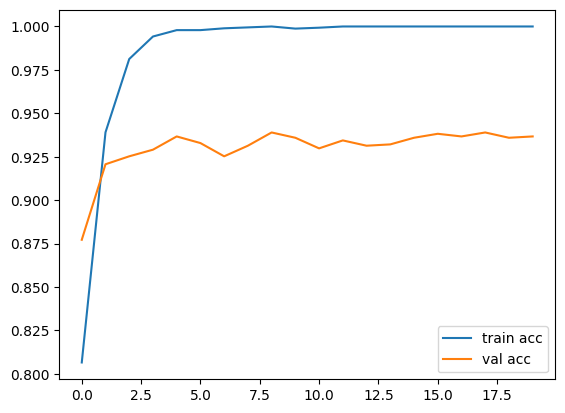

In [9]:
#plot the loss
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


#plot the accuracy
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()


In [10]:
# Checking the model accuracy
results = model.evaluate(test_set,verbose=0)

In [11]:
print("Test Loss: {:.5f}".format(results[0]))
print("Accuracy on the test set: {:.2f}%".format(results[1] * 100))

Test Loss: 0.69515
Accuracy on the test set: 93.67%


# Creating a model using PyTorch

* I will do the following now:
1. Defining the CNN model (CustomCNN).
2. Loading the MRI dataset and createing train and validation data loaders.
3. Setting up the loss function (CrossEntropyLoss) and optimizer (RMSprop).
4. Training the model for a specified number of epochs.
5. Evaluating the model on the validation set and calculating the accuracy.

In [ ]:
# Creating the model
model = nn.Sequential(

    #First convolution layer
    nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=1),

    #Second Convolution Layer
    nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=1),

    #Flattening the data before passing into the fully connected(Dense) layer
    nn.Flatten(),

    #Dense layers
    nn.Linear(in_features=16*218*218, out_features=100),
    nn.ReLU(),
    nn.Linear(in_features=100, out_features=100),
    nn.ReLU(),

    #Output layer
    nn.Linear(in_features=100, out_features=4),
    nn.Softmax(dim=1)
)

* **nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1)** - In this code snippet **in_channels** specifies the number of channels (or depth) in the input image or feature map and the **out_channels** parameter specifies the number of output channels (or feature maps) produced by the convolution operation. Each output channel represents a different set of learned filters applied to the input. Increasing the number of output channels allows the model to learn more diverse features and capture more complex patterns.


* **nn.Linear(in_features=64,out_features=100)** - In this code snippet **in_features** parameter specifies the number of input values (or neurons) to the linear layer. 

* The **dim** parameter indicates the dimension along which the softmax function is computed. Specifically, it determines the dimension over which the sum of exponentials is taken to normalize the input tensor.

In [ ]:
#Loading the data
training = "D:\\New folder\\ML\\Completed\\Brain Tumor Classification\\archive (1)\\Training" 
testing = "D:\\New folder\\ML\\Completed\\Brain Tumor Classification\\archive (1)\\Testing"

In [ ]:
# Define transformations to resize images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a uniform size
    transforms.Grayscale(),# Convert images to grayscale
    transforms.ToTensor()           # Convert images to PyTorch tensors
])

In [ ]:
train_set = ImageFolder(training, transform=transform)
test_set = ImageFolder(testing, transform=transform)

In [ ]:
#Creating data loaders
train_loader = DataLoader(train_set,batch_size=64,shuffle=True)
val_loader = DataLoader(test_set,batch_size=64)

for images, labels in train_loader:
    # Print the shape of the tensors
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    # Break after printing the shape of the first batch
    break

In [ ]:
#Instantiating the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(),lr=0.0001)

* **model.parameters()** is a method of the nn.Module class, and it is used to obtain an iterator over all the learnable parameters of the model. These parameters include the weights and biases of all the layers in the model.

#Training the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train() #Setting the model to the training mode
    running_loss = 0.0
    for images,labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(train_set)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss : {epoch_loss : .4f}")

In [ ]:
# Training the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()  # Setting the model to the training mode
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(train_set)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

**running_loss += loss.item() * images.size(0)**:
* **item()** - The item() method is used to extract the scalar value from a PyTorch tensor. Since loss is a PyTorch tensor representing the loss computed for a batch of data, loss.item() retrieves the loss value as a Python scalar.
  
* **images.size(0)**: This retrieves the size of the first dimension of the images tensor, which corresponds to the batch size. In PyTorch, size(dim) returns the size of the tensor along the specified dimension. Here, images.size(0) returns the batch size.

In [ ]:
#Evaluating the model on the testing set
model.eval() #Setting the model to the evaluation mode
all_preds = []
all_labels = []
with torch.no_grad():
    for images,labels in val_loader:
        outputs = model(images)
        _ , preds = torch.max(outputs,1)
        all_preds.extend(preds.tolist())
        all_labels.extend(labels.tolist())

* The **torch.max()** method is used to compute the maximum value along a specified dimension of a tensor. When called with a single tensor argument, torch.max() returns a tuple containing two tensors:

1. The first tensor contains the maximum values along the specified dimension
2. The second tensor contains the indices where the maximum values occur along the specified dimension.

* In the code snippet _, preds = torch.max(outputs, 1), the torch.max() method is used to find the predicted class labels for each sample in a batch. 

Here's what each part of the code do* s:
* outputs: This is the output tensor produced by the neural network model for a batch of input data. It typically has a shape of (batch_size, num_classes), where batch_size is the number of samples in the batch, and num_classes is the number of output clas* ses.

* torch.max(outputs, 1): This computes the maximum value along dimension 1 of the outputs tensor, which corresponds to the class dimension. The resulting tuple contains two tensors. The first tensor contains the maximum values along dimension 1. These values are not needed in this context, so we use _ to dis ard them. The second tensor contains the indices of the maximum values along dimension 1, which represent the predicted class labels.

* preds: This tensor contains the predicted class labels for each sample in the batch, where each element represents the index of the predicted class for the correspondi* ng sample.

* So, torch.max(outputs, 1) helps in extracting the predicted class labels from the output of the neural network model. These predicted labels (preds) can then be compared with the true labels to evaluate the performance of the model.

* **extend()** appends all elements of the list returned by tolist() to the end of all_preds. This allows us to add the predicted class labels from the current batch to all_preds efficiently without nested lists.

In [ ]:
#Calculating the model accuracy
accuracy = accuracy_score(all_labels,all_preds)
print(f"Validation Accuracy: {accuracy:.4f}")